In [2]:
# Import Modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_swiss_roll

In [3]:
# Read the dataset
raw_data = pd.read_csv("./data/toy_classification_raw.csv")

# Change the column names
raw_data.columns = ["x1", "x2", "y"]
print(raw_data)
colors = {0.0: "red", 1.0: "blue"}

# Add a column and set the value to 0
raw_data["aug"] = 0

# Fix the random seed
seed = 2023
np.random.seed(seed)

            x1         x2    y
0    23.657801  18.859917  0.0
1    22.573729  17.969223  0.0
2    32.553424  29.463651  0.0
3     6.718035  25.704665  1.0
4    14.401919  16.770856  0.0
..         ...        ...  ...
292  27.697220  18.799309  0.0
293  15.150959  72.000352  1.0
294  22.264378  68.453459  1.0
295  25.677420  90.118212  1.0
296  21.215594  48.265520  1.0

[297 rows x 3 columns]


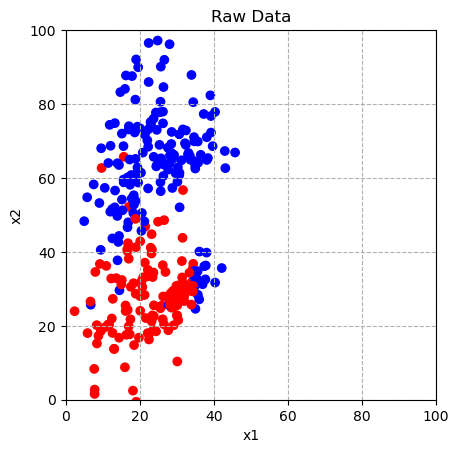

In [4]:
# Visualize the raw data

fig, ax = plt.subplots()
ax.scatter(raw_data["x1"], raw_data["x2"], c=raw_data["y"], cmap=ListedColormap(colors.values()))
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Raw Data")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect("equal")
ax.grid(True, which="both", ls="--")
plt.show()

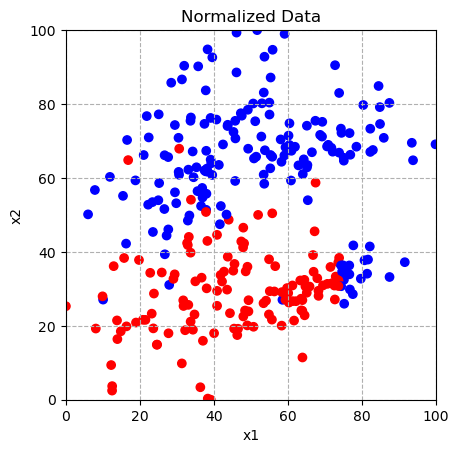

In [5]:
# Normalize the data between 0 and 100
norm_data = raw_data.copy()

norm_data["x1"] = (raw_data["x1"] - raw_data["x1"].min()) / (raw_data["x1"].max() - raw_data["x1"].min()) * 100
norm_data["x2"] = (raw_data["x2"] - raw_data["x2"].min()) / (raw_data["x2"].max() - raw_data["x2"].min()) * 100

# Visualize the normalized data
fig, ax = plt.subplots()
ax.scatter(norm_data["x1"], norm_data["x2"], c=norm_data["y"], cmap=ListedColormap(colors.values()))
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Normalized Data")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect("equal")
ax.grid(True, which="both", ls="--")
plt.show()

# Save the normalized data
norm_data.to_csv("./data/toy_classification_norm.csv", index=False)

0.0    69
1.0    60
Name: y, dtype: int64


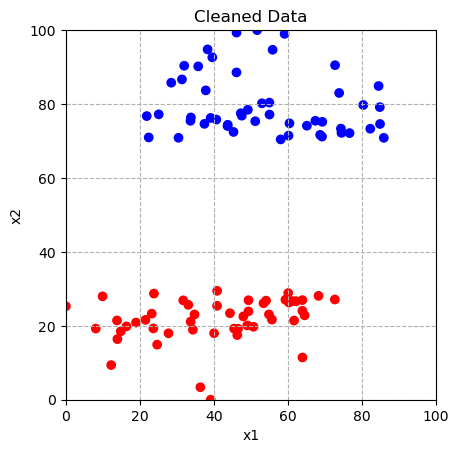

/tmp/ipykernel_31392/956720252.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean2_data["x1"][i] += 20
/tmp/ipykernel_31392/956720252.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean2_data["x1"][i] -= 20


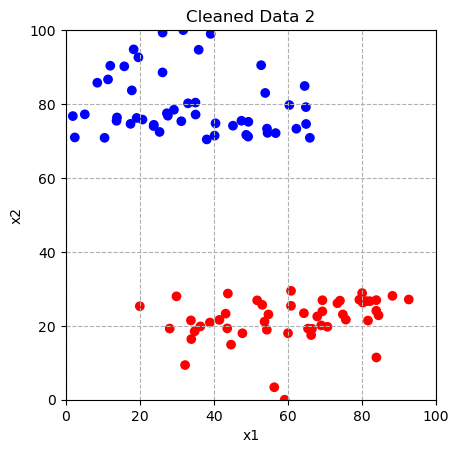

/tmp/ipykernel_31392/956720252.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean3_data["x1"][i] = x2
/tmp/ipykernel_31392/956720252.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean3_data["x2"][i] = 100 - x1


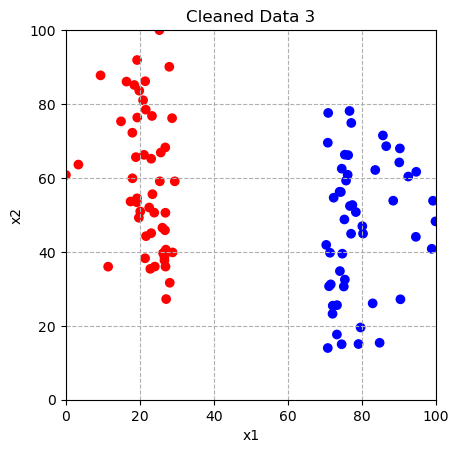

/tmp/ipykernel_31392/956720252.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clean3a_data = clean3a_data.append({"x1": 10, "x2": 10, "y": 0.0, "aug": 0}, ignore_index=True)
/tmp/ipykernel_31392/956720252.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clean3a_data = clean3a_data.append({"x1": 15, "x2": 8, "y": 0.0, "aug": 0}, ignore_index=True)


In [6]:
# Process the training data
clean_data = norm_data.copy()

# Only use x1 < 80 and x2 < 40 for class 0
# Only use x1 > 20 and x2 > 60 for class 1
for i in range(len(clean_data)):
    if clean_data["y"][i] == 0.0:
        if clean_data["x2"][i] > 30:
            clean_data.drop([i], inplace=True)
    elif clean_data["y"][i] == 1.0:
        if clean_data["x2"][i] < 70:
            clean_data.drop([i], inplace=True)

# Remain 50 data points for each class
print(clean_data["y"].value_counts())
clean_data = clean_data.groupby("y").head(50)

# Reset the index
clean_data.reset_index(drop=True, inplace=True)

# Visualize the processed data
fig, ax = plt.subplots()
ax.scatter(clean_data["x1"], clean_data["x2"], c=clean_data["y"], cmap=ListedColormap(colors.values()))
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Cleaned Data")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect("equal")
ax.grid(True, which="both", ls="--")
plt.show()

clean_data.to_csv("./data/toy_classification_clean.csv", index=False)

# Create clean2 data
clean2_data = clean_data.copy()

# shift right for class 0 and shift left for class 1
for i in range(len(clean2_data)):
    if clean2_data["y"][i] == 0.0:
        clean2_data["x1"][i] += 20
    elif clean2_data["y"][i] == 1.0:
        clean2_data["x1"][i] -= 20
    
# Visualize the processed data
fig, ax = plt.subplots()
ax.scatter(clean2_data["x1"], clean2_data["x2"], c=clean2_data["y"], cmap=ListedColormap(colors.values()))
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Cleaned Data 2")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect("equal")
ax.grid(True, which="both", ls="--")
plt.show()

clean2_data.to_csv("./data/toy_classification_clean2.csv", index=False)

# Create clean3 data
clean3_data = clean_data.copy()

# Rotate the data for 90 degrees
for i in range(len(clean3_data)):
    x1 = clean3_data["x1"][i]
    x2 = clean3_data["x2"][i]
    clean3_data["x1"][i] = x2
    clean3_data["x2"][i] = 100 - x1

# Visualize the processed data
fig, ax = plt.subplots()
ax.scatter(clean3_data["x1"], clean3_data["x2"], c=clean3_data["y"], cmap=ListedColormap(colors.values()))
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Cleaned Data 3")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect("equal")
ax.grid(True, which="both", ls="--")
plt.show()

clean3_data.to_csv("./data/toy_classification_clean3.csv", index=False)

# Add 2 handcrafted data points to clean3 data
clean3a_data = clean3_data.copy()

# Add 2 data points
clean3a_data = clean3a_data.append({"x1": 10, "x2": 10, "y": 0.0, "aug": 0}, ignore_index=True)
clean3a_data = clean3a_data.append({"x1": 15, "x2": 8, "y": 0.0, "aug": 0}, ignore_index=True)

clean3a_data.to_csv("./data/toy_classification_clean3a.csv", index=False)

0.0    100
1.0    100
Name: y, dtype: int64


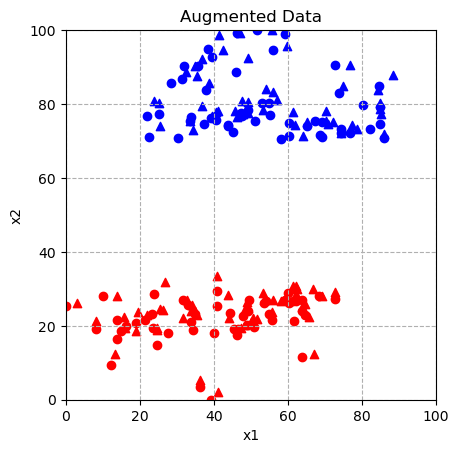

0.0    100
1.0    100
Name: y, dtype: int64


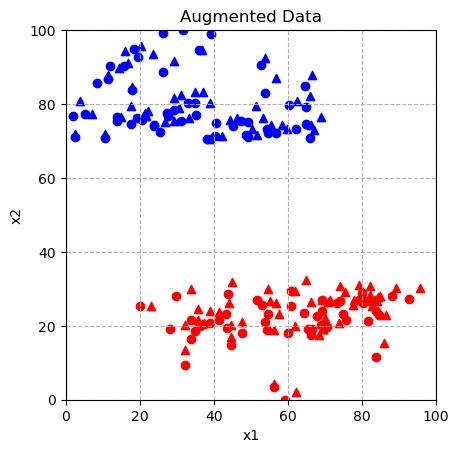

0.0    100
1.0    100
Name: y, dtype: int64


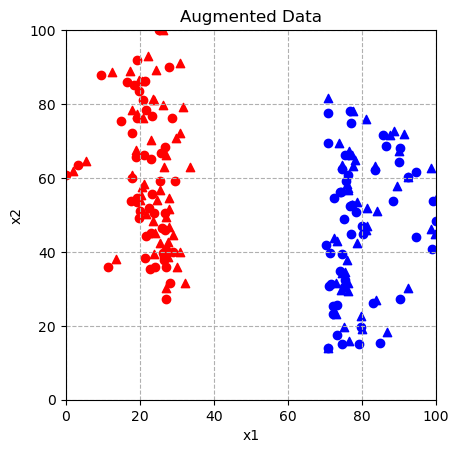

In [7]:
naive1_data = clean_data.copy()

# Augment the data
for i in range(len(naive1_data)):
    naive1_data = pd.concat([naive1_data, 
                           pd.DataFrame({"x1": naive1_data["x1"][i] + np.random.randint(0, 5),
                                         "x2": naive1_data["x2"][i] + np.random.randint(0, 5),
                                         "y": naive1_data["y"][i], "aug": 1}, index=[0])], ignore_index=True)

# Reset the index
naive1_data.reset_index(drop=True, inplace=True)
print(naive1_data["y"].value_counts())
        
# Visualize the processed data
fig, ax = plt.subplots()
for i in range(len(naive1_data)):
    if naive1_data["aug"][i] == 0:
        ax.scatter(naive1_data["x1"][i], naive1_data["x2"][i], c=colors[naive1_data["y"][i]], marker="o")
    else:
        ax.scatter(naive1_data["x1"][i], naive1_data["x2"][i], c=colors[naive1_data["y"][i]], marker="^")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Augmented Data")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect("equal")
ax.grid(True, which="both", ls="--")
plt.show()

naive1_data.to_csv("./data/toy_classification_naive.csv", index=False)

# Create naive3 data
naive2_data = clean2_data.copy()

# Augment the data
for i in range(len(naive2_data)):
    naive2_data = pd.concat([naive2_data, 
                           pd.DataFrame({"x1": naive2_data["x1"][i] + np.random.randint(0, 5),
                                         "x2": naive2_data["x2"][i] + np.random.randint(0, 5),
                                         "y": naive2_data["y"][i], "aug": 1}, index=[0])], ignore_index=True)

# Reset the index
naive2_data.reset_index(drop=True, inplace=True)
print(naive2_data["y"].value_counts())
        
# Visualize the processed data
fig, ax = plt.subplots()
for i in range(len(naive2_data)):
    if naive2_data["aug"][i] == 0:
        ax.scatter(naive2_data["x1"][i], naive2_data["x2"][i], c=colors[naive2_data["y"][i]], marker="o")
    else:
        ax.scatter(naive2_data["x1"][i], naive2_data["x2"][i], c=colors[naive2_data["y"][i]], marker="^")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Augmented Data")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect("equal")
ax.grid(True, which="both", ls="--")
plt.show()

naive2_data.to_csv("./data/toy_classification_naive2.csv", index=False)

# Create naive3 data
naive3_data = clean3_data.copy()

# Augment the data
for i in range(len(naive3_data)):
    naive3_data = pd.concat([naive3_data, 
                           pd.DataFrame({"x1": naive3_data["x1"][i] + np.random.randint(0, 5),
                                         "x2": naive3_data["x2"][i] + np.random.randint(0, 5),
                                         "y": naive3_data["y"][i], "aug": 1}, index=[0])], ignore_index=True)

# Reset the index
naive3_data.reset_index(drop=True, inplace=True)
print(naive3_data["y"].value_counts())
        
# Visualize the processed data
fig, ax = plt.subplots()
for i in range(len(naive3_data)):
    if naive3_data["aug"][i] == 0:
        ax.scatter(naive3_data["x1"][i], naive3_data["x2"][i], c=colors[naive3_data["y"][i]], marker="o")
    else:
        ax.scatter(naive3_data["x1"][i], naive3_data["x2"][i], c=colors[naive3_data["y"][i]], marker="^")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Augmented Data")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect("equal")
ax.grid(True, which="both", ls="--")
plt.show()

naive3_data.to_csv("./data/toy_classification_naive3.csv", index=False)

0.0    80
1.0    80
Name: y, dtype: int64


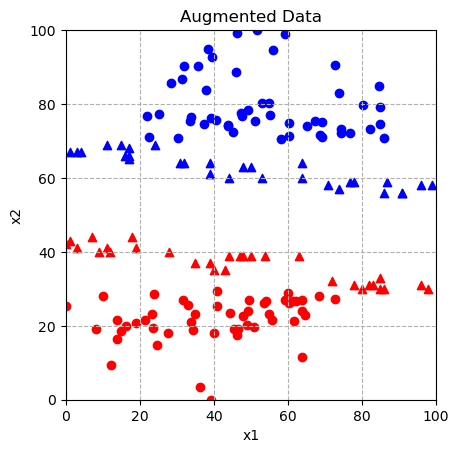

0.0    80
1.0    80
Name: y, dtype: int64


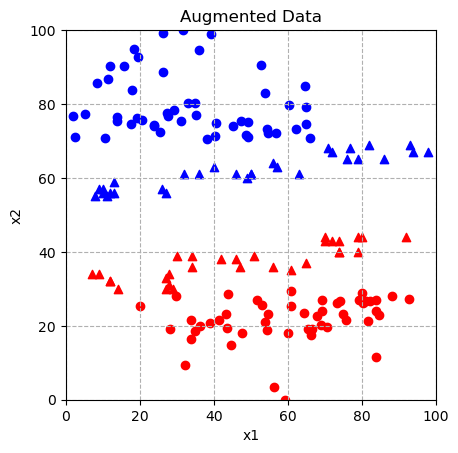

0.0    80
1.0    80
Name: y, dtype: int64


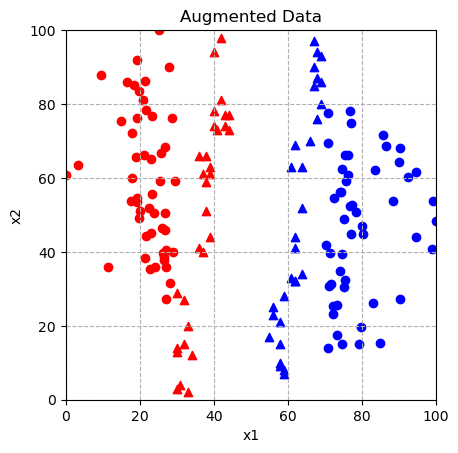

In [8]:
# Add 10 handcrafted data points for each class
aware1_data = clean_data.copy()

# Add 10 data points for each class, which is close to the optimal decision boundary
for i in range(10):
    aware1_data = pd.concat([aware1_data,
                           pd.DataFrame({"x1": np.random.randint(0, 30),
                                         "x2": np.random.randint(40, 45),
                                         "y": 0.0, "aug": 1}, index=[0])], ignore_index=True)
    aware1_data = pd.concat([aware1_data,
                           pd.DataFrame({"x1": np.random.randint(30, 70),
                                         "x2": np.random.randint(35, 40),
                                         "y": 0.0, "aug": 1}, index=[0])], ignore_index=True)
    aware1_data = pd.concat([aware1_data,
                           pd.DataFrame({"x1": np.random.randint(70, 100),
                                         "x2": np.random.randint(30, 35),
                                         "y": 0.0, "aug": 1}, index=[0])], ignore_index=True)
    
    aware1_data = pd.concat([aware1_data,
                           pd.DataFrame({"x1": np.random.randint(0, 30),
                                         "x2": np.random.randint(65, 70),
                                         "y": 1.0, "aug": 1}, index=[0])], ignore_index=True)
    aware1_data = pd.concat([aware1_data,
                           pd.DataFrame({"x1": np.random.randint(30, 70),
                                         "x2": np.random.randint(60, 65),
                                         "y": 1.0, "aug": 1}, index=[0])], ignore_index=True)
    aware1_data = pd.concat([aware1_data,
                           pd.DataFrame({"x1": np.random.randint(70, 100),
                                         "x2": np.random.randint(55, 60),
                                         "y": 1.0, "aug": 1}, index=[0])], ignore_index=True)

# Reset the index
aware1_data.reset_index(drop=True, inplace=True)
print(aware1_data["y"].value_counts())
        
# Visualize the processed data
fig, ax = plt.subplots()
for i in range(len(aware1_data)):
    if aware1_data["aug"][i] == 0:
        ax.scatter(aware1_data["x1"][i], aware1_data["x2"][i], c=colors[aware1_data["y"][i]], marker="o")
    else:
        ax.scatter(aware1_data["x1"][i], aware1_data["x2"][i], c=colors[aware1_data["y"][i]], marker="^")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Augmented Data")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect("equal")
ax.grid(True, which="both", ls="--")
plt.show()

aware1_data.to_csv("./data/toy_classification_aware1.csv", index=False)

# Create aware2 data
aware2_data = clean2_data.copy()

# Add 10 data points for each class, which is close to the optimal decision boundary
for i in range(10):
    aware2_data = pd.concat([aware2_data,
                           pd.DataFrame({"x1": np.random.randint(0, 30),
                                         "x2": np.random.randint(30, 35),
                                         "y": 0.0, "aug": 1}, index=[0])], ignore_index=True)
    aware2_data = pd.concat([aware2_data,
                           pd.DataFrame({"x1": np.random.randint(30, 70),
                                         "x2": np.random.randint(35, 40),
                                         "y": 0.0, "aug": 1}, index=[0])], ignore_index=True)
    aware2_data = pd.concat([aware2_data,
                           pd.DataFrame({"x1": np.random.randint(70, 100),
                                         "x2": np.random.randint(40, 45),
                                         "y": 0.0, "aug": 1}, index=[0])], ignore_index=True)
    
    aware2_data = pd.concat([aware2_data,
                           pd.DataFrame({"x1": np.random.randint(0, 30),
                                         "x2": np.random.randint(55, 60),
                                         "y": 1.0, "aug": 1}, index=[0])], ignore_index=True)
    aware2_data = pd.concat([aware2_data,
                           pd.DataFrame({"x1": np.random.randint(30, 70),
                                         "x2": np.random.randint(60, 65),
                                         "y": 1.0, "aug": 1}, index=[0])], ignore_index=True)
    aware2_data = pd.concat([aware2_data,
                           pd.DataFrame({"x1": np.random.randint(70, 100),
                                         "x2": np.random.randint(65, 70),
                                         "y": 1.0, "aug": 1}, index=[0])], ignore_index=True)

# Reset the index
aware2_data.reset_index(drop=True, inplace=True)
print(aware2_data["y"].value_counts())
        
# Visualize the processed data
fig, ax = plt.subplots()
for i in range(len(aware2_data)):
    if aware2_data["aug"][i] == 0:
        ax.scatter(aware2_data["x1"][i], aware2_data["x2"][i], c=colors[aware2_data["y"][i]], marker="o")
    else:
        ax.scatter(aware2_data["x1"][i], aware2_data["x2"][i], c=colors[aware2_data["y"][i]], marker="^")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Augmented Data")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect("equal")
ax.grid(True, which="both", ls="--")
plt.show()

aware2_data.to_csv("./data/toy_classification_aware2.csv", index=False)

# Create aware3 data
aware3_data = clean3_data.copy()

# Add 10 data points for each class, which is close to the optimal decision boundary
for i in range(10):
    aware3_data = pd.concat([aware3_data,
                           pd.DataFrame({"x1": np.random.randint(30, 35),
                                         "x2": np.random.randint(0, 30),
                                         "y": 0.0, "aug": 1}, index=[0])], ignore_index=True)
    aware3_data = pd.concat([aware3_data,
                           pd.DataFrame({"x1": np.random.randint(35, 40),
                                         "x2": np.random.randint(40, 70),
                                         "y": 0.0, "aug": 1}, index=[0])], ignore_index=True)
    aware3_data = pd.concat([aware3_data,
                           pd.DataFrame({"x1": np.random.randint(40, 45),
                                         "x2": np.random.randint(70, 100),
                                         "y": 0.0, "aug": 1}, index=[0])], ignore_index=True)
    
    aware3_data = pd.concat([aware3_data,
                           pd.DataFrame({"x1": np.random.randint(55, 60),
                                         "x2": np.random.randint(0, 30),
                                         "y": 1.0, "aug": 1}, index=[0])], ignore_index=True)
    aware3_data = pd.concat([aware3_data,
                           pd.DataFrame({"x1": np.random.randint(60, 65),
                                         "x2": np.random.randint(30, 70),
                                         "y": 1.0, "aug": 1}, index=[0])], ignore_index=True)
    aware3_data = pd.concat([aware3_data,
                           pd.DataFrame({"x1": np.random.randint(65, 70),
                                         "x2": np.random.randint(70, 100),
                                         "y": 1.0, "aug": 1}, index=[0])], ignore_index=True)

# Reset the index
aware3_data.reset_index(drop=True, inplace=True)
print(aware3_data["y"].value_counts())
        
# Visualize the processed data
fig, ax = plt.subplots()
for i in range(len(aware3_data)):
    if aware3_data["aug"][i] == 0:
        ax.scatter(aware3_data["x1"][i], aware3_data["x2"][i], c=colors[aware3_data["y"][i]], marker="o")
    else:
        ax.scatter(aware3_data["x1"][i], aware3_data["x2"][i], c=colors[aware3_data["y"][i]], marker="^")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Augmented Data")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect("equal")
ax.grid(True, which="both", ls="--")
plt.show()

aware3_data.to_csv("./data/toy_classification_aware3.csv", index=False)

1.0    104
0.0     59
Name: y, dtype: int64


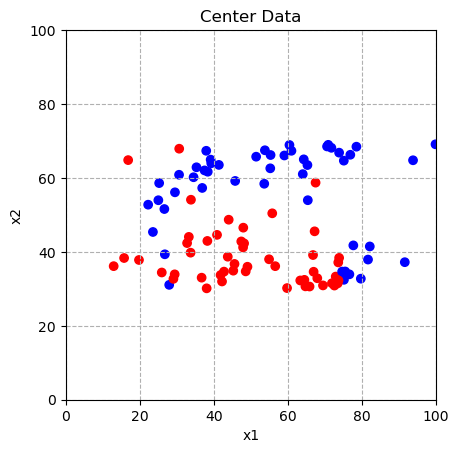

In [9]:
# Process the training data
center_data = norm_data.copy()

for i in range(len(center_data)):
    if center_data["x2"][i] > 70 or center_data["x2"][i] < 30:
        center_data.drop([i], inplace=True)

# Remain 50 data points for each class
print(center_data["y"].value_counts())
center_data = center_data.groupby("y").head(50)

# Reset the index
center_data.reset_index(drop=True, inplace=True)

# Visualize the processed data
fig, ax = plt.subplots()
ax.scatter(center_data["x1"], center_data["x2"], c=center_data["y"], cmap=ListedColormap(colors.values()))
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Center Data")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect("equal")
ax.grid(True, which="both", ls="--")
plt.show()

center_data.to_csv("./data/toy_classification_center.csv", index=False)

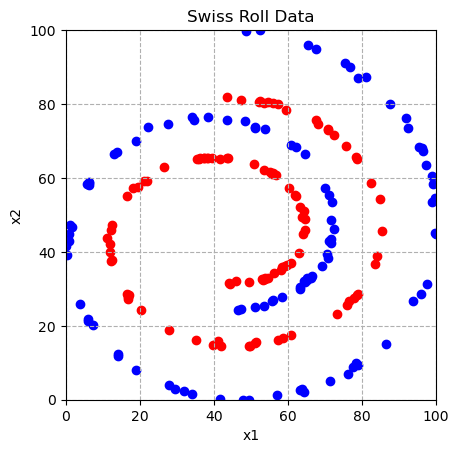

In [10]:
# Create the swiss roll data

swiss = make_swiss_roll(n_samples=100, noise=0.1, random_state=445)
swiss2 = make_swiss_roll(n_samples=100, noise=0.1, random_state=44)

# Create dataframe for swiss roll data
swiss_data = pd.DataFrame({"x1": swiss[0][:, 0], "x2": swiss[0][:, 2],
                            "y": 0, "aug": 0})
swiss2_data = pd.DataFrame({"x1": swiss2[0][:, 0]*1.35, "x2": swiss2[0][:, 2]*1.5,
                            "y": 1, "aug": 0})
# Concatenate the data
swiss_data = pd.concat([swiss_data, swiss2_data], ignore_index=True)
# Normalize the data to [0, 100]
swiss_data["x1"] = (swiss_data["x1"] - swiss_data["x1"].min()) / (swiss_data["x1"].max() - swiss_data["x1"].min()) * 100
swiss_data["x2"] = (swiss_data["x2"] - swiss_data["x2"].min()) / (swiss_data["x2"].max() - swiss_data["x2"].min()) * 100

fig, ax = plt.subplots()
for i in range(len(swiss_data)):
    if swiss_data["aug"][i] == 0:
        ax.scatter(swiss_data["x1"][i], swiss_data["x2"][i], c=colors[swiss_data["y"][i]], marker="o")
    else:
        ax.scatter(swiss_data["x1"][i], swiss_data["x2"][i], c=colors[swiss_data["y"][i]], marker="^")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Swiss Roll Data")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect("equal")
ax.grid(True, which="both", ls="--")
plt.show()

swiss_data.to_csv("./data/toy_classification_swiss.csv", index=False)

0    200
1    200
Name: y, dtype: int64


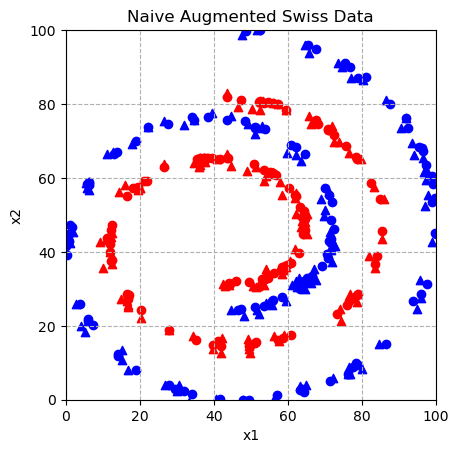

In [11]:
# Naive augmentation for swiss roll data
naive_swiss_data = swiss_data.copy()

# Augment the data
for i in range(len(naive_swiss_data)):
    naive_swiss_data = pd.concat([naive_swiss_data, 
                           pd.DataFrame({"x1": naive_swiss_data["x1"][i] + np.random.randint(-2, 2),
                                         "x2": naive_swiss_data["x2"][i] + np.random.randint(-2, 2),
                                         "y": naive_swiss_data["y"][i], "aug": 1}, index=[0])], ignore_index=True)

# Reset the index
naive_swiss_data.reset_index(drop=True, inplace=True)
print(naive_swiss_data["y"].value_counts())
        
# Visualize the processed data
fig, ax = plt.subplots()
for i in range(len(naive_swiss_data)):
    if naive_swiss_data["aug"][i] == 0:
        ax.scatter(naive_swiss_data["x1"][i], naive_swiss_data["x2"][i], c=colors[naive_swiss_data["y"][i]], marker="o")
    else:
        ax.scatter(naive_swiss_data["x1"][i], naive_swiss_data["x2"][i], c=colors[naive_swiss_data["y"][i]], marker="^")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Naive Augmented Swiss Data")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect("equal")
ax.grid(True, which="both", ls="--")
plt.show()

naive_swiss_data.to_csv("./data/toy_classification_swiss_naive.csv", index=False)

/tmp/ipykernel_31392/180613543.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aware_swiss_data = aware_swiss_data.append({"x1": 43, "x2": 29, "y": 0.0, "aug": 1}, ignore_index=True)
/tmp/ipykernel_31392/180613543.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aware_swiss_data = aware_swiss_data.append({"x1": 47, "x2": 29, "y": 0.0, "aug": 1}, ignore_index=True)
/tmp/ipykernel_31392/180613543.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aware_swiss_data = aware_swiss_data.append({"x1": 51, "x2": 30, "y": 0.0, "aug": 1}, ignore_index=True)
/tmp/ipykernel_31392/180613543.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  

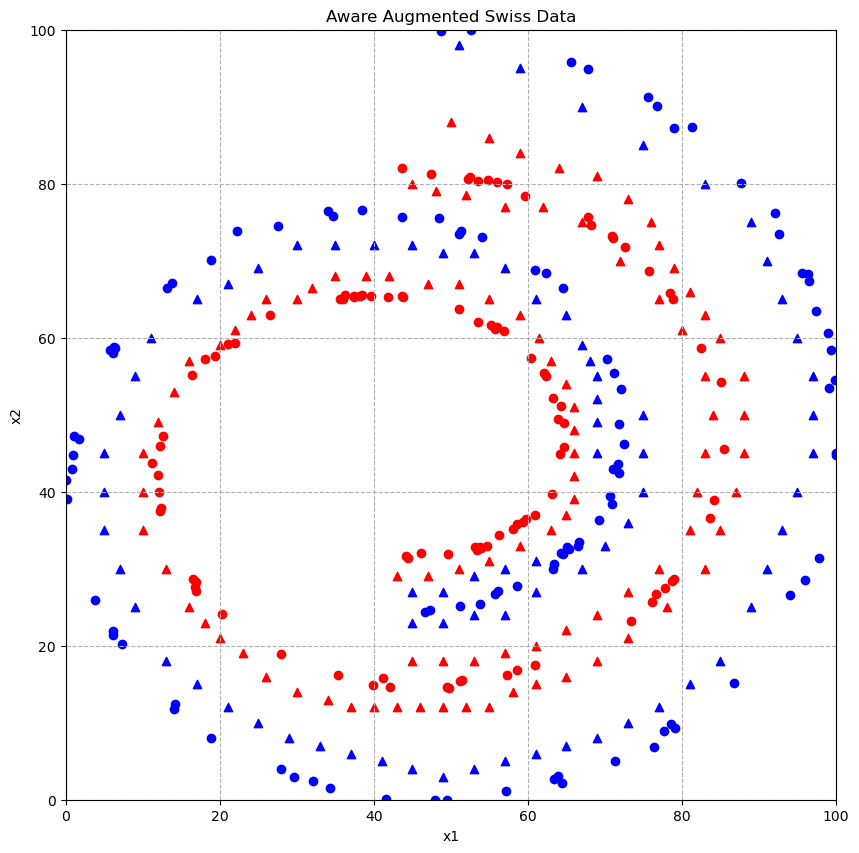

In [12]:
# Naive augmentation for swiss roll data
aware_swiss_data = swiss_data.copy()

# Add data for thick margin
aware_swiss_data = aware_swiss_data.append({"x1": 43, "x2": 29, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 47, "x2": 29, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 51, "x2": 30, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 55, "x2": 31, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 59, "x2": 33, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 63, "x2": 35, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 65, "x2": 37, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 66, "x2": 39, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 66, "x2": 42, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 66, "x2": 45, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 66, "x2": 48, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 66, "x2": 51, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 65, "x2": 54, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 63, "x2": 57, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 61.5, "x2": 60, "y": 0.0, "aug": 1}, ignore_index=True)

################## YOUAREHERE
aware_swiss_data = aware_swiss_data.append({"x1": 45, "x2": 18, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 49, "x2": 18, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 53, "x2": 18, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 57, "x2": 19, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 61, "x2": 20, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 65, "x2": 22, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 69, "x2": 24, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 73, "x2": 27, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 77, "x2": 30, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 81, "x2": 35, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 82, "x2": 40, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 83, "x2": 45, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 84, "x2": 50, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 83, "x2": 55, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 80, "x2": 61, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 77, "x2": 65, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 72, "x2": 70, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 67, "x2": 75, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 62, "x2": 77, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 57, "x2": 77, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 52, "x2": 78.5, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 48, "x2": 79, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 45, "x2": 80, "y": 0.0, "aug": 1}, ignore_index=True)

aware_swiss_data = aware_swiss_data.append({"x1": 50, "x2": 88, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 55, "x2": 86, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 59, "x2": 84, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 64, "x2": 82, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 69, "x2": 81, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 73, "x2": 78, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 76, "x2": 75, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 77, "x2": 72, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 79, "x2": 69, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 81, "x2": 66, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 83, "x2": 63, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 85, "x2": 60, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 88, "x2": 55, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 88, "x2": 50, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 88, "x2": 45, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 87, "x2": 40, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 85, "x2": 35, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 83, "x2": 30, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 78, "x2": 25, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 73, "x2": 21, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 69, "x2": 18, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 65, "x2": 16, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 61, "x2": 15, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 58, "x2": 14, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 55, "x2": 12, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 52, "x2": 12, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 49, "x2": 12, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 46, "x2": 12, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 43, "x2": 12, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 40, "x2": 12, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 37, "x2": 12, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 34, "x2": 13, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 30, "x2": 14, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 26, "x2": 16, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 23, "x2": 19, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 20, "x2": 21, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 18, "x2": 23, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 16, "x2": 25, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 13, "x2": 30, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 10, "x2": 35, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 10, "x2": 40, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 10, "x2": 45, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 12, "x2": 49, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 14, "x2": 53, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 16, "x2": 57, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 20, "x2": 59, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 22, "x2": 61, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 24, "x2": 63, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 26, "x2": 65, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 30, "x2": 65, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 32, "x2": 66.5, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 35, "x2": 68, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 39, "x2": 68, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 42, "x2": 68, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 47, "x2": 67, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 51, "x2": 67, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 55, "x2": 65, "y": 0.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 59, "x2": 63, "y": 0.0, "aug": 1}, ignore_index=True)

aware_swiss_data = aware_swiss_data.append({"x1": 45, "x2": 23, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 49, "x2": 23, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 53, "x2": 24, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 57, "x2": 24, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 61, "x2": 27, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 67, "x2": 30, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 70, "x2": 33, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 73, "x2": 36, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 75, "x2": 40, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 75, "x2": 45, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 75, "x2": 50, "y": 1.0, "aug": 1}, ignore_index=True)

aware_swiss_data = aware_swiss_data.append({"x1": 45, "x2": 27, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 49, "x2": 27, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 53, "x2": 29, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 57, "x2": 30, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 61, "x2": 31, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 69, "x2": 45, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 69, "x2": 49, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 69, "x2": 52, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 69, "x2": 55, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 68, "x2": 57, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 67, "x2": 59, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 65, "x2": 63, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 61, "x2": 65, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 57, "x2": 69, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 53, "x2": 71, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 49, "x2": 71, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 45, "x2": 72, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 40, "x2": 72, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 35, "x2": 72, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 30, "x2": 72, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 25, "x2": 69, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 21, "x2": 67, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 17, "x2": 65, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 11, "x2": 60, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 9, "x2": 55, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 7, "x2": 50, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 5, "x2": 45, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 5, "x2": 40, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 5, "x2": 35, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 7, "x2": 30, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 9, "x2": 25, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 13, "x2": 18, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 17, "x2": 15, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 21, "x2": 12, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 25, "x2": 10, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 29, "x2": 8, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 33, "x2": 7, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 37, "x2": 6, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 41, "x2": 5, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 45, "x2": 4, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 49, "x2": 3, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 53, "x2": 4, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 57, "x2": 5, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 61, "x2": 6, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 65, "x2": 7, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 69, "x2": 8, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 73, "x2": 10, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 77, "x2": 12, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 81, "x2": 15, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 85, "x2": 18, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 89, "x2": 25, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 91, "x2": 30, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 93, "x2": 35, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 95, "x2": 40, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 97, "x2": 45, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 97, "x2": 50, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 97, "x2": 55, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 95, "x2": 60, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 93, "x2": 65, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 91, "x2": 70, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 89, "x2": 75, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 83, "x2": 80, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 75, "x2": 85, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 67, "x2": 90, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 59, "x2": 95, "y": 1.0, "aug": 1}, ignore_index=True)
aware_swiss_data = aware_swiss_data.append({"x1": 51, "x2": 98, "y": 1.0, "aug": 1}, ignore_index=True)

# Visualize the processed data
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
for i in range(len(aware_swiss_data)):
    if aware_swiss_data["aug"][i] == 0:
        ax.scatter(aware_swiss_data["x1"][i], aware_swiss_data["x2"][i], c=colors[aware_swiss_data["y"][i]], marker="o")
    else:
        ax.scatter(aware_swiss_data["x1"][i], aware_swiss_data["x2"][i], c=colors[aware_swiss_data["y"][i]], marker="^")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Aware Augmented Swiss Data")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect("equal")
ax.grid(True, which="both", ls="--")
plt.show()

aware_swiss_data.to_csv("./data/toy_classification_swiss_aware.csv", index=False)